In [2]:
import numpy as np
import pandas as pd

In [3]:
hr_df=pd.read_csv("D:\\Data Science\\HRdata.csv")
hr_df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [6]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [7]:
hr_df.shape

(49653, 18)

Is our dataset good? Are there missing values?

In [8]:
#main_df.isnull()
hr_df[hr_df.isnull().any(axis=1)]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT


In [109]:
# Removing employee ID
hr_df_final = hr_df.drop(columns=['store_name','gender_full','termreason_desc','termtype_desc','EmployeeID','STATUS_YEAR','orighiredate_key','terminationdate_key','birthdate_key','recorddate_key'])
hr_df_final.head()

,age,length_of_service,city_name,department_name,job_title,gender_short,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,M,ACTIVE,HEADOFFICE
1,53,18,Vancouver,Executive,CEO,M,ACTIVE,HEADOFFICE
2,54,19,Vancouver,Executive,CEO,M,ACTIVE,HEADOFFICE
3,55,20,Vancouver,Executive,CEO,M,ACTIVE,HEADOFFICE
4,56,21,Vancouver,Executive,CEO,M,ACTIVE,HEADOFFICE


In [110]:
hr_df_final.groupby('department_name').sum()

,age,length_of_service
department_name,,
Accounting,3574,1213
Accounts Payable,2049,685
Accounts Receiveable,2339,774
Audit,1419,456
Bakery,348472,85883
Compensation,1419,455
Customer Service,229024,43279
Dairy,308944,64694
Employee Records,2664,868


In [111]:
hr_df_final.groupby('department_name').mean()

,age,length_of_service
department_name,,
Accounting,60.576271,20.559322
Accounts Payable,60.264706,20.147059
Accounts Receiveable,59.974359,19.846154
Audit,59.125000,19.000000
Bakery,41.578809,10.247345
Compensation,59.125000,18.958333
Customer Service,32.157259,6.076804
Dairy,35.927899,7.523433
Employee Records,60.545455,19.727273


In [112]:
hr_df_final['department_name'].value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Labor Relations              34
Accounts Payable             34
Training                     30
Compensation                 24
Investment                   24
Audit                        24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

In [113]:
hr_df_final['STATUS'].value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

Correlation Matrix

No handles with labels found to put in legend.


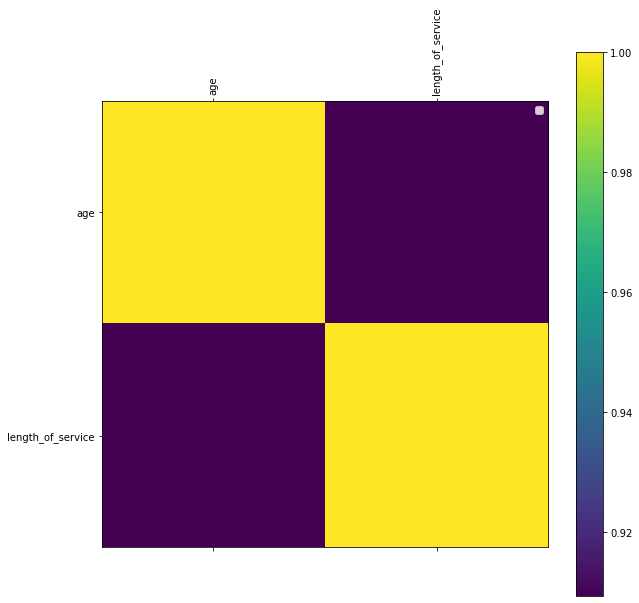

In [114]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
   
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(hr_df_final)

In [115]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department_name','job_title','city_name','BUSINESS_UNIT','gender_short']
hr_df_final = pd.get_dummies(hr_df_final, columns=categorial, drop_first=True)
hr_df_final.head()

,age,length_of_service,STATUS,department_name_Accounts Payable,department_name_Accounts Receiveable,department_name_Audit,department_name_Bakery,department_name_Compensation,department_name_Customer Service,department_name_Dairy,...,city_name_Trail,city_name_Valemount,city_name_Vancouver,city_name_Vernon,city_name_Victoria,city_name_West Vancouver,city_name_White Rock,city_name_Williams Lake,BUSINESS_UNIT_STORES,gender_short_M
0,52,17,ACTIVE,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,53,18,ACTIVE,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,54,19,ACTIVE,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,20,ACTIVE,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,56,21,ACTIVE,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [116]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = hr_df_final.drop(['STATUS'],axis=1).values

# We assigned those label values to our Y dataset
y = hr_df_final['STATUS'].values

In [117]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [118]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,-0.807930,-0.541228,-0.024588,-0.029878,-0.022121,2.203696,-0.020074,-0.410390,-0.456547,-0.031292,...,-0.13902,-0.027361,-0.538535,-0.135539,-0.331374,-0.112054,-0.070315,-0.110597,0.108173,-0.953135
1,0.799333,0.880425,-0.024588,-0.029878,-0.022121,-0.453783,-0.020074,-0.410390,-0.456547,-0.031292,...,-0.13902,-0.027361,-0.538535,-0.135539,-0.331374,-0.112054,-0.070315,-0.110597,0.108173,-0.953135
2,0.156428,-0.067344,-0.024588,-0.029878,-0.022121,-0.453783,-0.020074,2.436704,-0.456547,-0.031292,...,-0.13902,-0.027361,-0.538535,-0.135539,-0.331374,-0.112054,-0.070315,-0.110597,0.108173,1.049169
3,-1.049019,-0.857151,-0.024588,-0.029878,-0.022121,-0.453783,-0.020074,2.436704,-0.456547,-0.031292,...,-0.13902,-0.027361,1.856890,-0.135539,-0.331374,-0.112054,-0.070315,-0.110597,0.108173,-0.953135
4,0.718970,0.564502,-0.024588,-0.029878,-0.022121,-0.453783,-0.020074,-0.410390,-0.456547,-0.031292,...,-0.13902,-0.027361,-0.538535,-0.135539,-0.331374,-0.112054,-0.070315,-0.110597,0.108173,-0.953135


In [120]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
count,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,...,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04,3.475700e+04
mean,1.371225e-16,-2.444746e-16,-8.680661e-16,-1.639015e-15,-1.610508e-15,-5.540239e-16,1.518368e-15,-1.598041e-15,-9.196225e-18,1.403225e-15,...,2.220012e-15,4.158986e-16,-4.218189e-15,3.321240e-15,-1.222421e-15,-3.614095e-15,1.429890e-15,-3.681046e-17,-1.176624e-15,-7.078730e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.852650e+00,-1.646958e+00,-2.458780e-02,-2.987813e-02,-2.212124e-02,-4.537831e-01,-2.007384e-02,-4.103905e-01,-4.565465e-01,-3.129182e-02,...,-1.390203e-01,-2.736075e-02,-5.385347e-01,-1.355394e-01,-3.313745e-01,-1.120539e-01,-7.031498e-02,-1.105970e-01,-9.244469e+00,-9.531353e-01
25%,-8.882926e-01,-8.571511e-01,-2.458780e-02,-2.987813e-02,-2.212124e-02,-4.537831e-01,-2.007384e-02,-4.103905e-01,-4.565465e-01,-3.129182e-02,...,-1.390203e-01,-2.736075e-02,-5.385347e-01,-1.355394e-01,-3.313745e-01,-1.120539e-01,-7.031498e-02,-1.105970e-01,1.081728e-01,-9.531353e-01
50%,-4.298272e-03,-6.734392e-02,-2.458780e-02,-2.987813e-02,-2.212124e-02,-4.537831e-01,-2.007384e-02,-4.103905e-01,-4.565465e-01,-3.129182e-02,...,-1.390203e-01,-2.736075e-02,-5.385347e-01,-1.355394e-01,-3.313745e-01,-1.120539e-01,-7.031498e-02,-1.105970e-01,1.081728e-01,-9.531353e-01
75%,8.796961e-01,7.224633e-01,-2.458780e-02,-2.987813e-02,-2.212124e-02,-4.537831e-01,-2.007384e-02,-4.103905e-01,-4.565465e-01,-3.129182e-02,...,-1.390203e-01,-2.736075e-02,-5.385347e-01,-1.355394e-01,-3.313745e-01,-1.120539e-01,-7.031498e-02,-1.105970e-01,1.081728e-01,1.049169e+00
max,1.844054e+00,2.460039e+00,4.067057e+01,3.346929e+01,4.520541e+01,2.203696e+00,4.981609e+01,2.436704e+00,2.190357e+00,3.195723e+01,...,7.193194e+00,3.654870e+01,1.856890e+00,7.377927e+00,3.017734e+00,8.924275e+00,1.422172e+01,9.041834e+00,1.081728e-01,1.049169e+00


Train a Logistic Regression Model

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 97.09%
[[14449    22]
 [  411    14]]
              precision    recall  f1-score   support

      ACTIVE       0.97      1.00      0.99     14471
  TERMINATED       0.39      0.03      0.06       425

    accuracy                           0.97     14896
   macro avg       0.68      0.52      0.52     14896
weighted avg       0.96      0.97      0.96     14896



RandomForest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.55%
[[14432    39]
 [  177   248]]
              precision    recall  f1-score   support

      ACTIVE       0.99      1.00      0.99     14471
  TERMINATED       0.86      0.58      0.70       425

    accuracy                           0.99     14896
   macro avg       0.93      0.79      0.84     14896
weighted avg       0.98      0.99      0.98     14896

